In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=30, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=14, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-01 11:47:50.301131: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-1c81782c-b5f2-43d3-8a66-b6b94a7f5fa2.json


table  o_pose :  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
ben_cube0  o_pose :  [[-0.99833062  0.05775794  0.         -0.34006171]
 [-0.05775794 -0.99833062  0.          0.59777838]
 [ 0.          0.          1.          0.79229998]
 [ 0.          0.          0.          1.        ]]
bottle0  o_pose :  [[-0.44628384 -0.89489147  0.         -0.21132009]
 [ 0.89489147 -0.44628384  0.          0.49846736]
 [ 0.          0.          1.          0.83215735]
 [ 0.          0.          0.          1.        ]]
can0  o_pose :  [[-0.98551936 -0.16956296  0.         -0.26125986]
 [ 0.16956296 -0.98551936  0.          0.87988355]
 [ 0.          0.          1.          0.80759666]
 [ 0.          0.          0.          1.        ]]
cereal0  o_pose :  [[-0.67457655  0.7382049   0.         -0.47868132]
 [-0.7382049  -0.67457655  0.          0.41233326]
 [ 0.          0.          1.          0.84226188]
 [ 0.          0.          0.          1.        ]]
table  o_pose :  [[1. 0. 0.

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
        use_pick_action=False,
        consider_next_scene=True, 
    )
mcts.only_optimize_1 = False

2023-08-01 11:47:53.660761: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-01 11:47:53.731382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 11:47:53.731523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-01 11:47:53.731546: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-01 11:47:53.744386: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-01 11:47:53.744482: I tensorflow/strea

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-01 11:47:57.763736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 11:47:57.764482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 11:47:57.764612: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-01 11:47:57.764676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negati

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-01 11:47:58.632661: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-01 11:47:58.632713: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-01 11:47:58.632728: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-01 11:47:58.633193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 11:47:58.633656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 11:47:58.634044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]), 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]), 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188])}
{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.47189415 -0.22862241  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.40412951 -0.10179989  0.87515735]), 'can0': Object(name=can0, pos=[ 0.6645213  -0.10141758  0.85059666]), 'cereal0': Object(name=cereal0, pos=[0.42014769 0.00883087 0.88526188])}


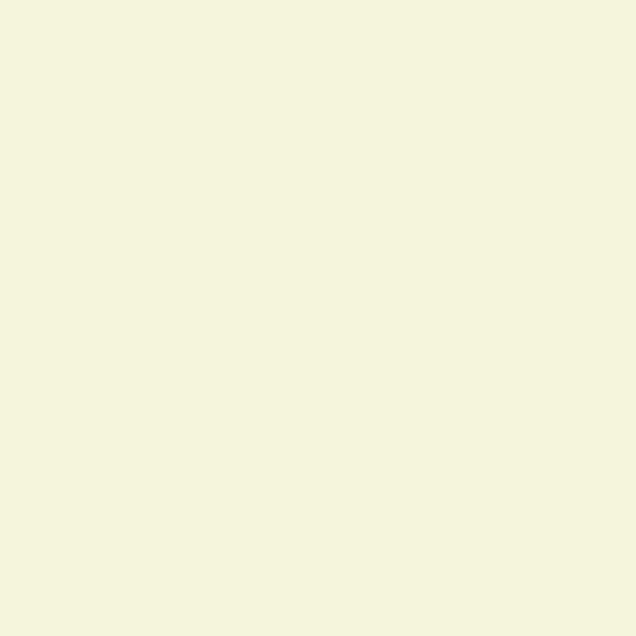

In [3]:
# #######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

In [3]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 1 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(8) Reward : 5.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(8) -> A(9) -> S'(14) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(14) -> A(18) -> S'(20) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(20) -> A(21) -> S'(26) Reward : -5.0
[Action] Rearr bottle0
Good Action
[Reward] S(26) -> A(28) -> S'(33) Reward : 1.667
[Action] Rearr cereal0
placed another place not goal
[Reward] S(33) -> A(38) -> S'(40) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(40) -> A(45) -> S'(46) Reward : 1.25
[Action] Rearr cereal0
placed another place not goal
[Reward] S(46) -> A(49) -> S'(51) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(51) -> A(53) -> S'(55) Reward : 1.0
[Action] Rearr can0
Bad Action
[Reward] S(55) -> A(57) -> S'(60) Reward : -2.0
[Action] Re

[Action] Rearr cereal0
placed another place not goal
[Reward] S(291) -> A(296) -> S'(298) Reward : -1
Exceeded the maximum depth!!
########### Running time :  6.3741395473480225 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 5 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(5) -> S'(299) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(299) -> A(305) -> S'(306) Reward : 3.333
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(306) -> A(307) -> S'(312) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(312) -> A(316) -> S'(317) Reward : -5.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(317) -> A(319) -> S'(322) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(322) -> A(328) -> S'(329) Reward : 1.429
[Action] Rearr can0
placed another place not goal
[Reward] S(329) -> A(333) -> S'(335) Reward : -1
[Action] Rearr bottle0
placed another place n

2023-08-01 11:48:20.078141: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-01 11:48:20.531102: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-01 11:48:21.292972: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-01 11:48:21.805939: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-08-01 11:48:22.315294: W tensorflow/core/common_runtime/bfc_allocator.cc:337] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact.

Generated 116 grasps for object cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0111 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0108 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0110 sec

bottle0
Extracted Region Cube Size:  0.4
Generated 72 grasps for object bottle0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1098 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1159 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1144 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1159 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1149 sec

failed at IK 
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0169 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0099 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0100 sec

solve the problem using LM2!! 

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000018


Generated 110 grasps for object cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0064 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0070 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0076 sec

level 1_5 :  [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
pick cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0097 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 9 --> 80
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 1.578
WorkingTime[run]: 5.5874 sec

WorkingTime[run]: 0.1151 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1243 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 1/5 



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 2/5 



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 3/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 4/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 5/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path.. The number of retries of 6 exceeded


WorkingTime[run]: 35.1843 sec

Pick joint Fail
[[0, 7, 446, 450, 452, 455, 458, 461, 463, 465, 469, 470, 475, 478, 480, 481, 485, 487, 490, 494, 495, 497, 500, 503, 504]]
Add level_1_node!
########### Running time :  59.95775508880615 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 8 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(7) -> S'(446) Reward : 5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(446) -> A(447) -> S'(505) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(505) -> A(506) -> S'(510) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(510) -> A(514) -> S'(516) Reward : 2.0
[Action] Rearr bottle0
Good Action
[Reward] S(516) -> A(520) -> S'(522) Reward : 1.667
[Action] Rearr cereal0
Bad Action
[Reward] S(522) -> A(526) -> S'(527) Reward : -3.333
[Action] Rearr can0
Bad Action
[Reward] S(527) -> A(531) -> S'(532) Reward : -2.857
[Action] Rearr ben_c

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 14 grasps for object ben_cube0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0065 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0075 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0079 sec

level 1_5 :  [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
pick cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0113 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 2.558
WorkingTime[run]: 5.3054 sec

WorkingTime[run]: 0.1185 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1254 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 1/5 



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 2/5 



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 3/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 4/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 5/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path.. The number of retries of 6 exceeded


WorkingTime[run]: 33.8196 sec

Pick joint Fail
[[0, 7, 446, 450, 452, 455, 458, 461, 463, 465, 469, 470, 475, 478, 480, 481, 485, 487, 490, 494, 495, 497, 500, 503, 504], [0, 7, 446, 448, 571, 574, 576, 579, 581, 582, 585, 586, 590, 594, 596, 600, 602, 604, 607]]
Add level_1_node!
########### Running time :  105.71202492713928 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 10 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(7) -> S'(446) Reward : 5.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(446) -> A(449) -> S'(608) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(608) -> A(610) -> S'(614) Reward : 2.5
[Action] Rearr can0
Good Action
[Reward] S(614) -> A(616) -> S'(618) Reward : 2.0
[Action] Rearr cereal0
Bad Action
[Reward] S(618) -> A(621) -> S'(622) Reward : -4.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(622) -> A(624) -> S'(627) Reward : -1
[Action] Rear

Generated 101 grasps for object cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0076 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0083 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0074 sec

bottle0
Extracted Region Cube Size:  0.4
Generated 52 grasps for object bottle0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0075 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0083 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0085 sec

ben_cube0
Extracted Region Cube Size:  0.4
Generated 12 grasps for object ben_cube0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0073 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0083 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0085 sec

cereal0
Extracted Region Cube Size:  0.4
Generated 109 grasps for object cereal0
solve the problem using LM2!! 


[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Generated 22 grasps for object can0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0073 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0084 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0086 sec

level 1_5 :  [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
pick cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0111 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 2.191
WorkingTime[run]: 5.4918 sec

WorkingTime[run]: 0.1256 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1293 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 1/5 



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 2/5 



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 3/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 4/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 5/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path.. The number of retries of 6 exceeded


WorkingTime[run]: 34.3968 sec

Pick joint Fail
[[0, 7, 446, 450, 452, 455, 458, 461, 463, 465, 469, 470, 475, 478, 480, 481, 485, 487, 490, 494, 495, 497, 500, 503, 504], [0, 7, 446, 448, 571, 574, 576, 579, 581, 582, 585, 586, 590, 594, 596, 600, 602, 604, 607], [0, 7, 446, 450, 452, 453, 809, 813, 814, 818, 820, 821, 826, 831, 832, 836, 838, 840, 842, 845, 847]]
Add level_1_node!
########### Running time :  156.1244888305664 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 14 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(7) -> S'(446) Reward : 5.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(446) -> A(448) -> S'(571) Reward : 3.333
[Action] Rearr bottle0
Good Action
[Reward] S(571) -> A(573) -> S'(848) Reward : 2.5
[Action] Rearr can0
placed another place not goal
[Reward] S(848) -> A(850) -> S'(853) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(853) -> A(855) -> S'(856) Reward : -4.0
[Action] Re

Generated 36 grasps for object ben_cube0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0103 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0108 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0110 sec

bottle0
Extracted Region Cube Size:  0.4
Random sample points 
Generated 30 grasps for object bottle0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0084 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0095 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0099 sec

can0
Extracted Region Cube Size:  0.4
Generated 45 grasps for object can0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0064 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0072 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0076 sec

ben_cube0
Extracted Region Cube Size:  0.4
Generated 2 grasps for object ben_cube0
solve the proble

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000005
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000015
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Generated 73 grasps for object bottle0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0058 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0061 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0065 sec

level 1_5 :  [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
pick cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0107 sec

{('rightfinger', 'bottle0')}
*********************** Scene ***********************
{'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188]),
 'table': Object(name=table, pos=[ 0.9   -0.6    0.043])}
panda Transform(po

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000011
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


WorkingTime[inverse_kinematics]: 0.0269 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0366 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0210 sec

{('rightfinger', 'bottle0')}
*********************** Scene ***********************
{'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188]),
 'table': Object(name=table, pos=[ 0.9   -0.6    0.043])}
panda Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
panda_gripper [[ 0.31485917  0.67840477 -0.66380017  0.54749155]
 [ 0.11257841 -0.72112754 -0.6835943  -0.05224356]
 [-0.94243822  0.14050637 -0.30342735  0.92704796]
 [ 0.          0.          0.          1.        ]]
***************************************************************

***************

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000005
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


WorkingTime[inverse_kinematics]: 0.0104 sec

{('rightfinger', 'bottle0')}
*********************** Scene ***********************
{'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188]),
 'table': Object(name=table, pos=[ 0.9   -0.6    0.043])}
panda Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
panda_gripper [[ 0.31485881  0.67840469 -0.66380043  0.54749172]
 [ 0.11257869 -0.72112772 -0.68359407 -0.05224354]
 [-0.94243831  0.14050583 -0.30342732  0.92704791]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot Collision Info ********************
panda_link_0 [0.    0.    0.913]
panda_pedestal [ 0.26     0.345   -0.00188]
panda_link_1 [0.    0.    1

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


WorkingTime[inverse_kinematics]: 0.0165 sec

{('rightfinger', 'bottle0')}
*********************** Scene ***********************
{'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188]),
 'table': Object(name=table, pos=[ 0.9   -0.6    0.043])}
panda Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
panda_gripper [[ 0.31485918  0.67840464 -0.66380031  0.54749157]
 [ 0.11257847 -0.72112768 -0.68359414 -0.05224359]
 [-0.94243821  0.14050627 -0.30342742  0.92704795]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot Collision Info ********************
panda_link_0 [0.    0.    0.913]
panda_pedestal [ 0.26     0.345   -0.00188]
panda_link_1 [0.    0.    1

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000007
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[ERROR] [RRT Star Planner]: Not found IK solution


WorkingTime[inverse_kinematics]: 0.0234 sec

{('rightfinger', 'bottle0')}
*********************** Scene ***********************
{'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188]),
 'table': Object(name=table, pos=[ 0.9   -0.6    0.043])}
panda Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
panda_gripper [[ 0.31486016  0.67840528 -0.66379918  0.54749111]
 [ 0.11257938 -0.721127   -0.68359471 -0.05224361]
 [-0.94243778  0.14050664 -0.30342861  0.92704818]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot Collision Info ********************
panda_link_0 [0.    0.    0.913]
panda_pedestal [ 0.26     0.345   -0.00188]
panda_link_1 [0.    0.    1

[Action] Rearr can0
placed another place not goal
[Reward] S(1037) -> A(1038) -> S'(1042) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1042) -> A(1044) -> S'(1048) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1048) -> A(1050) -> S'(1054) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1054) -> A(1055) -> S'(1059) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1059) -> A(1060) -> S'(1065) Reward : -1.538
[Action] Rearr cereal0
Good Action
[Reward] S(1065) -> A(1071) -> S'(1072) Reward : 0.667
Exceeded the maximum depth!!
########### Running time :  168.88739252090454 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 18 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(7) -> S'(446) Reward : 5.0
[Action] Rearr bottle0
Good Action
[Reward] S(446) -> A(450) -> S'(452) Reward : 3.333
[Action] Rearr can0
Good Action
[Reward] 

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000021


Generated 14 grasps for object ben_cube0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0074 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0087 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0088 sec

level 1_5 :  [True, True, True, True, True, True, True, True]
pick cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0113 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0158 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0110 sec

rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 3.439
WorkingTime[run]: 5.1702 sec

WorkingTime[run]: 0.1221 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000005
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1296 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 1/5 



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 2/5 



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 3/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 4/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 5/5 



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[ERROR] [RRT Star Planner]: Failed Generate Path.. The number of retries of 6 exceeded


WorkingTime[run]: 34.9613 sec

Pick joint Fail
[[0, 7, 446, 450, 452, 455, 458, 461, 463, 465, 469, 470, 475, 478, 480, 481, 485, 487, 490, 494, 495, 497, 500, 503, 504], [0, 7, 446, 448, 571, 574, 576, 579, 581, 582, 585, 586, 590, 594, 596, 600, 602, 604, 607], [0, 7, 446, 450, 452, 453, 809, 813, 814, 818, 820, 821, 826, 831, 832, 836, 838, 840, 842, 845, 847], [0, 7, 446, 448, 571, 575, 963, 964, 968, 971, 974, 976, 979, 981, 983, 985, 987, 988, 992, 995, 997, 1000, 1002, 1004, 1007, 1012, 1013, 1016, 1018], [0, 7, 446, 450, 452, 456, 1073, 1075, 1078]]
Add level_1_node!
########### Running time :  211.21918606758118 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 19 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(7) -> S'(446) Reward : 5.0
[Action] Rearr bottle0
Good Action
[Reward] S(446) -> A(450) -> S'(452) Reward : 3.333
[Action] Rearr cereal0
Bad Action
[Reward] S(452) -> A(457) -> S'(1079) Reward : -6.

[Action] Rearr cereal0
placed another place not goal
[Reward] S(1271) -> A(1274) -> S'(1276) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(1276) -> A(1277) -> S'(1278) Reward : -1.818
[Action] Rearr cereal0
Good Action
[Reward] S(1278) -> A(1281) -> S'(1282) Reward : 0.769
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1282) -> A(1283) -> S'(1287) Reward : -1.538
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1287) -> A(1288) -> S'(1292) Reward : -1
Exceeded the maximum depth!!
########### Running time :  216.1358036994934 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 23 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(7) -> S'(446) Reward : 5.0
[Action] Rearr bottle0
Good Action
[Reward] S(446) -> A(450) -> S'(452) Reward : 3.333
[Action] Rearr can0
Good Action
[Reward] S(452) -> A(456) -> S'(1073) Reward : 2.5
[Action] Rearr cereal0
Bad Action
[Reward] S(1073) -> A(1077) -> S'(1293)

Generated 111 grasps for object cereal0
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0112 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0107 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0156 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0108 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0140 sec

failed at IK 
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0125 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0205 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0184 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0221 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0143 sec

failed at IK 
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0142 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0076 sec

solve the problem us

[Action] Rearr cereal0
Bad Action
[Reward] S(1460) -> A(1465) -> S'(1466) Reward : -3.333
[Action] Rearr can0
placed another place not goal
[Reward] S(1466) -> A(1470) -> S'(1472) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1472) -> A(1473) -> S'(1478) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1478) -> A(1482) -> S'(1483) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1483) -> A(1484) -> S'(1489) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1489) -> A(1490) -> S'(1496) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1496) -> A(1497) -> S'(1501) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(1501) -> A(1502) -> S'(1508) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1508) -> A(1511) -> S'(1514) Reward : -1
Exceeded the maximum depth!!
########### Running time :  228.426492929

In [4]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

17.433333333333334 {0: {'nodes': [0, 7, 446, 450, 452, 455, 458, 461, 463, 465, 469, 470, 475, 478, 480, 481, 485, 487, 490, 494, 495, 497, 500, 503, 504], 'value': 6.152564102564103}, 1: {'nodes': [0, 7, 446, 448, 571, 574, 576, 579, 581, 582, 585, 586, 590, 594, 596, 600, 602, 604, 607], 'value': 9.461111111111112}, 2: {'nodes': [0, 7, 446, 450, 452, 453, 809, 813, 814, 818, 820, 821, 826, 831, 832, 836, 838, 840, 842, 845, 847], 'value': 6.492424242424244}, 3: {'nodes': [0, 7, 446, 448, 571, 575, 963, 964, 968, 971, 974, 976, 979, 981, 983, 985, 987, 988, 992, 995, 997, 1000, 1002, 1004, 1007, 1012, 1013, 1016, 1018], 'value': -0.03589188589188552}, 4: {'nodes': [0, 7, 446, 450, 452, 456, 1073, 1075, 1078], 'value': 17.433333333333334}, 5: {'nodes': [0, 7, 446, 448, 571, 574, 576, 578, 1400, 1404, 1405, 1409, 1411, 1416, 1417, 1420, 1423, 1425, 1428, 1429, 1432, 1436, 1437, 1442, 1443, 1448, 1449, 1451, 1454], 'value': 4.626445776445776}}
Result 4 :  [0, 7, 446, 450, 452, 456, 1073,

In [5]:
mcts.history_level_2_dict

{}

In [6]:
########## level 1 ##########
if mcts.history_level_2_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))

In [7]:
max_value_nodes, mcts.level_wise_2_success

([0, 7, 446, 450, 452, 456, 1073, 1075, 1078], False)

In [12]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(mcts.optimal_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [14]:
pick_all_objects, place_all_object_poses

NameError: name 'pick_all_objects' is not defined

In [13]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([ 0.01838046,  0.21976561, -0.0064567 , -2.33331139, -0.03325662,
                          2.56321411, -0.69717962]),
                  array([ 0.03676092,  0.24318169, -0.0129134 , -2.31042828, -0.06651324,
                          2.50843434, -0.60896107]),
                  array([ 0.05514138,  0.26659776, -0.01937009, -2.28754518, -0.09976987,
                          2.45365457, -0.52074253]),
                  array([ 0.07352184,  0.29001384, -0.02582679, -2.26466208, -0.13302649,
                          2.39887481, -0.43252398]),
                  array([ 0.09190229,  0.31342991, -0.03228349, -2.24177897, -0.16628311,
                          2.34409504, -0.34430543]),
                  array([ 0.11028275,  0.33684598, -0.03874019, -2.21889587, -0.19953973,
                          2.28931527, -0.25608689]),
                  array([ 0.12866321,  0.36026206, -0.04519689, -2.19601276, -0.23279635,
                      

In [14]:
for i in mcts.history_level_1_dict[0]['nodes']:
    if not mcts.tree.nodes[i]['level1_5']:
        print("Error 1.5", i)
for i in mcts.history_level_1_dict[0]['nodes']:
    if not mcts.tree.nodes[i]['level2']:
        print("Error 2", i)
        

In [15]:
mcts.tree.nodes[0]['state'].objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.39587317 0.02541839 0.83529998]),
 'can0': Object(name=can0, pos=[0.66714729 0.06273526 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.31638119 -0.11948705  0.88526188])}

0 scene
100 scene
200 scene
300 scene
400 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


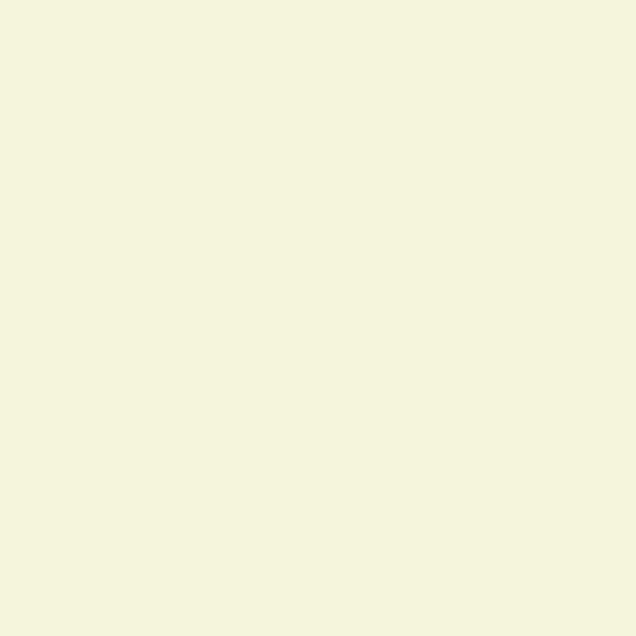

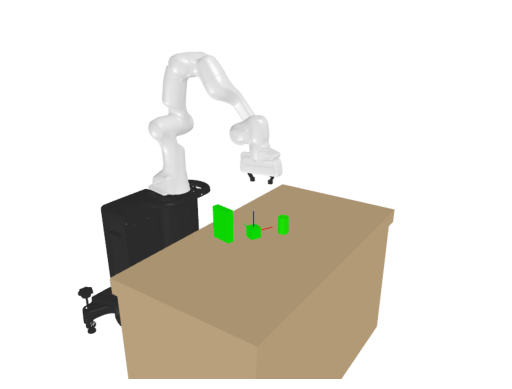

In [16]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="pick_rearrangement1_consider_next_scene",
)


In [13]:
mcts.rearr_action.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.47189415 -0.17278644  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.40412951 -0.07766955  0.87515735]),
 'can0': Object(name=can0, pos=[ 0.6645213  -0.07738281  0.85059666]),
 'cereal0': Object(name=cereal0, pos=[0.42014769 0.00530352 0.88526188])}

In [14]:
from pytamp.search.node_data import NodeData

action = mcts.tree.nodes[195].get(NodeData.ACTION)
'grasp' in list(action.keys())

False

In [15]:
from pytamp.search.node_data import NodeData

visited_nodes = [
                True for n in max_value_nodes if mcts.tree.nodes[n][NodeData.LEVEL1_5] is True
            ]
# visited_nodes.append(False)
all(visited_nodes)

True

# Get first & last scene per node

In [55]:
i = 0
current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]

In [17]:
for i in next_node['joints'][0]:
    _ = next_node['joints'][0]
    print(i)
    first_joint = _[i][0]
    last_joint = _[i][-1]
    print(f"{i}'s first joints : ", first_joint)
    print(f"{i}'s last joints : ", last_joint)

pre_grasp
pre_grasp's first joints :  [ 1.59875977e-02  2.33460937e-01  9.32852109e-03 -2.30543127e+00
 -1.94288206e-03  2.59642431e+00 -8.52161359e-01]
pre_grasp's last joints :  [ 0.13878074  0.92266739  0.16746391 -1.49200986 -0.00698525  2.27942866
 -2.05617986]
grasp
grasp's first joints :  [ 0.13878074  0.92266739  0.16746391 -1.49200986 -0.00698525  2.27942866
 -2.05617986]
grasp's last joints :  [ 0.1530003   1.01344772  0.16117063 -1.4700854  -0.01239578  2.34895925
 -2.05326445]
post_grasp
post_grasp's first joints :  [ 0.1530003   1.01344772  0.16117063 -1.4700854  -0.01239578  2.34895925
 -2.05326445]
post_grasp's last joints :  [ 0.1438158   0.90359212  0.17016521 -1.527412   -0.0057249   2.29665627
 -2.04780251]
default_grasp
default_grasp's first joints :  [ 0.14176572  0.8877146   0.16843497 -1.54345802 -0.00630722  2.29219422
 -2.01563568]
default_grasp's last joints :  [ 0.00000000e+00  1.96349541e-01  4.33680869e-19 -2.35619449e+00
  0.00000000e+00  2.61799388e+00 -7

In [56]:
def render_rearr_state(action, ax, title, next_node, current_node):
#     action.scene_mngr.set_robot_eef_pose(next_node['joints'][0]['grasp'][-1])
    action.scene_mngr.set_robot_eef_pose(mcts.rearr_action.scene_mngr.scene.robot.init_qpos)

    action.scene_mngr.render_robot(ax,action.scene_mngr.scene)
    action.scene_mngr.render_objects(ax, current_node['state'])
    action.render_axis(action.scene_mngr)
    action.scene_mngr.render_axis(ax, current_node['grasp_poses'][0]['grasp'])
    
    q_thetas = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        mcts.rearr_action.scene_mngr.scene.robot.init_qpos,
        current_node['grasp_poses'][0]['grasp']
        )

    action.scene_mngr.set_robot_eef_pose(q_thetas)

    mcts.rearr_action.scene_mngr.render_gripper(ax)

    action.scene_mngr.render_axis(ax, current_node['grasp_poses'][0]['pre_grasp'])
    action.scene_mngr.render_axis(ax, current_node['grasp_poses'][0]['post_grasp'])
    action.show()

In [57]:
render_rearr_state(mcts.rearr_action, None, "1", next_node, current_node)

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0084 sec



In [15]:
mcts.rearr_action.scene_mngr.scene.robot.init_qpos

array([ 6.33525628e-13, -5.38478180e-01,  5.44820130e-12, -2.69413060e+00,
        2.15158886e-12,  2.22111507e+00, -7.85398163e-01])

In [41]:
mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose()

array([[-4.91581748e-04,  9.97858672e-01,  6.54051098e-02,
         5.19275050e-01],
       [ 9.99999879e-01,  4.92636585e-04, -9.46554640e-12,
        -3.00136249e-12],
       [-3.22209594e-05,  6.54051019e-02, -9.97858793e-01,
         1.46586664e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [45]:
offset = np.zeros((4,4))
offset[0,3] = -0.15

In [46]:
q_thetas = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
    mcts.rearr_action.scene_mngr.scene.robot.init_qpos,
    mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose() + offset,
)
q_thetas

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0066 sec



array([ 6.33525628e-13, -5.38478180e-01,  5.44820130e-12, -2.69413060e+00,
        2.15158886e-12,  2.22111507e+00, -7.85398163e-01])

In [48]:
q_thetas

array([ 6.33525628e-13, -5.38478180e-01,  5.44820130e-12, -2.69413060e+00,
        2.15158886e-12,  2.22111507e+00, -7.85398163e-01])

In [18]:
mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose()

array([[-4.88653487e-04,  9.91914615e-01,  1.26906102e-01,
         4.57231706e-01],
       [ 9.99999879e-01,  4.92636585e-04, -9.32454114e-12,
        -4.31918418e-12],
       [-6.25185978e-05,  1.26906086e-01, -9.91914735e-01,
         1.01204387e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

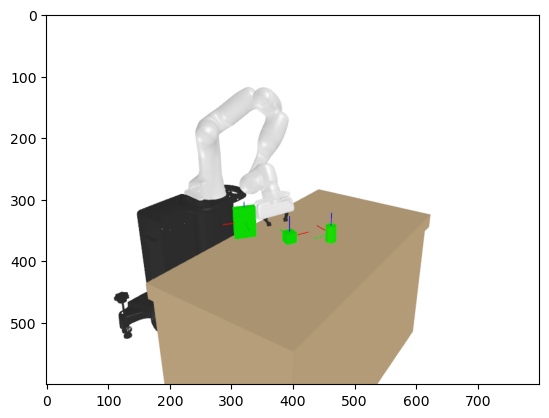

In [32]:
import matplotlib.pyplot as plt 
ax_trimesh = plt.gca()
# fig_trimesh = plt.figure()

mcts.rearr_action.scene_mngr.render_objects(None, next_node['state'])
for i in next_node['state'].objs:
    mcts.rearr_action.scene_mngr.render.render_obj_axis(None, next_node['state'].objs[i].h_mat)
mcts.rearr_action.scene_mngr.render.render_robot(robot=mcts.rearr_action.scene_mngr.scene.robot, geom=mcts.rearr_action.scene_mngr.geom)
mcts.rearr_action.scene_mngr.render.trimesh_scene.set_camera(
    angles=(1.2, 0, 0.6), distance=2, center=(0.5, 0, 1)
)
img = mcts.rearr_action.scene_mngr.render.get_scene_img(True)
# print(i ,"render")
plt.imshow(img)

In [ ]:

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
    video_name="pick_rearrangement1_level2_test_7_12",
)


In [ ]:
# mcts._level_wise_between_1_and_2_optimize(max_value_nodes)

In [ ]:
# import random
# from copy import deepcopy
# from pykin.utils.kin_utils import ShellColors as sc

# def get_grasp_action_using_contact_graspnet(success_level_1_sub_nodes):
#     node_length = int(len(success_level_1_sub_nodes)/2)
#     for i in range(node_length):
#         current_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 1]]
#         next_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 2]]
#         obj_to_manipulate =current_node['action']['rearr_obj_name']
        
#         print(f"{sc.COLOR_BROWN}{obj_to_manipulate}{sc.ENDC}")
#         for _ in range(2):
#             grasps = mcts.grasp_generator.get_grasp(
#                 init_scene = rearrangement1.init_scene,
#                 next_node = next_node,
#                 current_node = current_node,
#                 )
#             if len(grasps)>=1:
#                 grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)
#                 current_node[mcts.rearr_action.info.GRASP_POSES] = grasp_poses_not_collision
#                 break
#         g_ = random.sample(grasp_poses_not_collision,1)
#         next_node['action'].update(deepcopy(g_[0]))
        

In [ ]:
# get_grasp_action_using_contact_graspnet(max_value_nodes)

In [ ]:
# node_length = int(len(max_value_nodes)/2)
# node_length

# for i in range(node_length):
#     success_level_1_sub_nodes = max_value_nodes

#     current_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 1]]
#     next_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 2]]
#     obj_to_manipulate =current_node['action']['rearr_obj_name']
    
#     print(obj_to_manipulate)
#     for _ in range(2):
#         grasps = mcts.grasp_generator.get_grasp(
#             init_scene = rearrangement1.init_scene,
#             next_node = next_node,
#             current_node = current_node,
#             )
#         if len(grasps)>=1:
#             grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)
#             current_node[mcts.rearr_action.info.GRASP_POSES] = grasp_poses_not_collision
#             break
            
#     g_ = random.sample(grasp_poses_not_collision,1)
#     next_node['action'].update(deepcopy(g_[0]))

In [16]:
i = 2
current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]

In [17]:
current_node['state'].rearr_obj_name, next_node['state'].rearr_obj_name

('ben_cube0', 'cereal0')

In [18]:
next_node

{'number': 304,
 'visit': 2,
 'depth': 3,
 'state': <pytamp.scene.scene.Scene at 0x7f5c0032ce50>,
 'action': {'table': array([[-0.71264251, -0.70152737,  0.        ,  0.35238887],
         [ 0.70152737, -0.71264251,  0.        ,  0.02368256],
         [ 0.        ,  0.        ,  1.        ,  0.88526188],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'grasp': array([[-0.87924679, -0.39294609,  0.26929215,  0.275605  ],
         [-0.36708286,  0.91917598,  0.14270803,  0.09536066],
         [-0.30360341,  0.02662303, -0.95242643,  1.05189332],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'pre_grasp': array([[-0.8792468 , -0.3929461 ,  0.26929215,  0.2621404 ],
         [-0.36708286,  0.919176  ,  0.14270803,  0.08822525],
         [-0.3036034 ,  0.02662303, -0.95242643,  1.0995146 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
        dtype=float32),
  'post_grasp': array([[-0.8792468 , -0.3929461 ,  0.26929215,  0.275605  ],

In [19]:
current_node

{'depth': 3,
 'state': <pytamp.scene.scene.Scene at 0x7f5c69edb3a0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'cereal0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[-0.71264251, -0.70152737,  0.        ,  0.35238887],
           [ 0.70152737, -0.71264251,  0.        ,  0.02368256],
           [ 0.        ,  0.        ,  1.        ,  0.88526188],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 5,
 'value_history': [5, 5],
 'visit': 2,
 'number': 303,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'level1_5': True,
 'success': False,
 'cost': 0,
 'test': (),
 'grasp_poses': [{'grasp': array([[-0.87924679, -0.39294609,  0.26929215,  0.275605  ],
          [-0.36708286,  0.91917598,  0.14270803,  0.09536066],
          [-0.30360341,  0.02662303, -0.95242643,  1.05189332],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'pre_grasp': array([[-0.8792468 , -0.3929461 ,  0.26929215,  0.26214

In [21]:
grasps = mcts.grasp_generator.get_grasp(
    init_scene=mcts.init_scene,
    next_node=next_node,
    current_node=current_node,
)

Extracted Region Cube Size:  0.4
Generated 90 grasps for object cereal0


In [31]:
grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)


In [35]:
mcts.rearr_action.scene_mngr.scene.robot.joint_limits_lower
mcts.rearr_action.scene_mngr.scene.robot.joint_limits_upper

[2.9671, 1.8326, 2.9671, 0.0, 2.9671, 3.8223, 2.9671]

In [33]:
for i in grasp_poses_not_collision:
    print(i)

{'grasp': array([[ 0.87747388,  0.39630197,  0.27015582,  0.25089969],
       [ 0.41267061, -0.91087073, -0.00417502,  0.10973725],
       [ 0.2444225 ,  0.11514885, -0.96280745,  1.03602643],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'pre_grasp': array([[ 0.8774739 ,  0.39630195,  0.27015582,  0.2373919 ],
       [ 0.4126706 , -0.91087073, -0.00417502,  0.109946  ],
       [ 0.24442251,  0.11514885, -0.9628075 ,  1.0841668 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_grasp': array([[ 0.8774739 ,  0.39630195,  0.27015582,  0.2508997 ],
       [ 0.4126706 , -0.91087073, -0.00417502,  0.10973725],
       [ 0.24442251,  0.11514885, -0.9628075 ,  1.0860264 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}
{'grasp': array([[-0.8091509 , -0.38317924,  0.44547534,  0.2428585 ],
       [-0.41759816,  0.90834546,  0.02280534,  0.10073341],
       [-0.41338403, -0.16757675, -0.8950037 ,  1.0

grasp
pre_grasp
post_grasp
release
pre_release
post_release


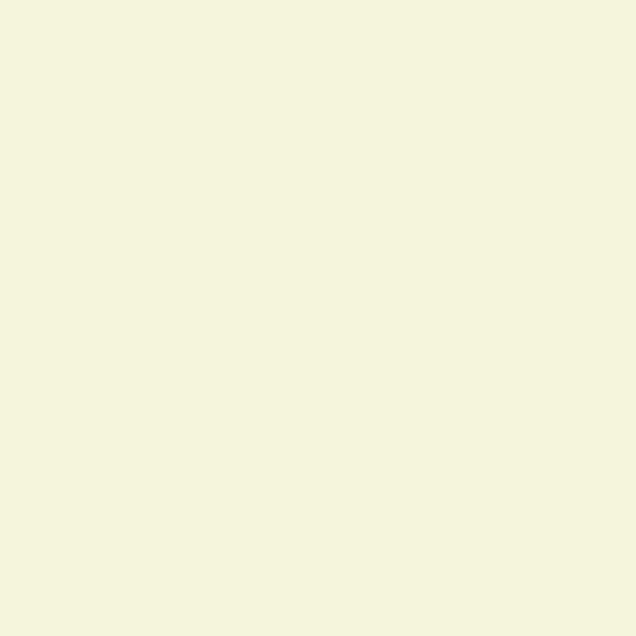

In [25]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")


for i,o in current_node['state'].objs.items():
    mcts.rearr_action.scene_mngr.set_object_pose(i,o.h_mat)
    
for action in next_node['action']:
    if 'grasp' in action or 'release' in action:
    
        print(action)
        mcts.rearr_action.scene_mngr.set_gripper_pose(next_node['action'][action])
        mcts.rearr_action.scene_mngr.render_gripper(ax)

#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['pre_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['post_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

grasp
pre_grasp
post_grasp
release
pre_release
post_release


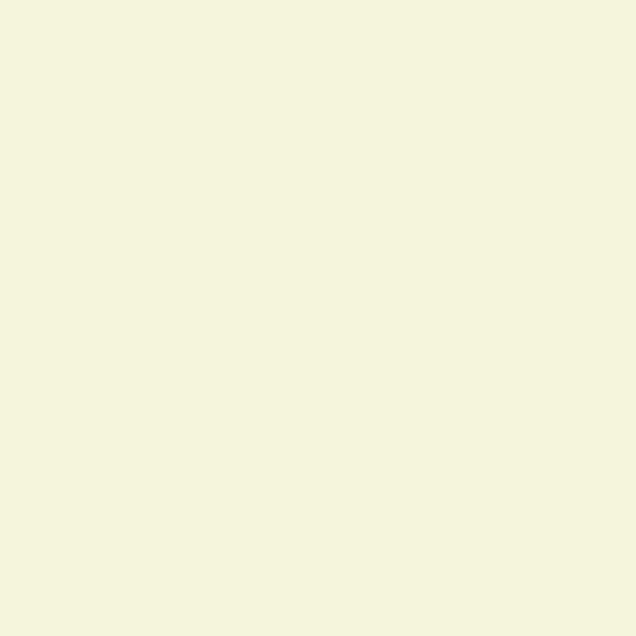

In [ ]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")


for i,o in next_node['state'].objs.items():
    mcts.rearr_action.scene_mngr.set_object_pose(i,o.h_mat)
    
for action in next_node['action']:
    if 'grasp' in action or 'release' in action:
    
        print(action)
        mcts.rearr_action.scene_mngr.set_gripper_pose(next_node['action'][action])
        mcts.rearr_action.scene_mngr.render_gripper(ax)

#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['pre_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['post_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [34]:
mcts.rearr_action.scene_mngr.render.render_objects(mcts.rearr_action.scene_mngr.scene.objs)

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
    video_name="pick_rearrangement1_level2_test_7_12",
)

IndexError: list index out of range

In [ ]:
next_node['state'].objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.39377654 -0.05920111  0.83529998]),
 'can0': Object(name=can0, pos=[0.58836741 0.27068778 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[0.40992969 0.07529909 0.88526188])}